In [1]:
#Neural Network classification with Pytorch

#classification is a problem of predicting weather something is one thing or another(there can be multiple things as the options)

#Make classification data and get it ready

import sklearn
from sklearn.datasets import make_circles

#make 1000 samples
n_samples=1000

#create circles
X,y=make_circles(n_samples,
                noise=0.3,
                random_state=42)

In [2]:
len(X),len(y)

(1000, 1000)

In [3]:
print(f"First 5 of X:{X[:5]}")
print(f"First 5 of y:{y[:5]}")

First 5 of X:[[ 0.59171471  0.43674853]
 [-0.45745002  0.36160118]
 [-1.01069349  0.83042101]
 [-0.87169639  0.41407292]
 [ 0.48803455 -0.87258708]]
First 5 of y:[1 1 1 1 0]


In [4]:
#Create a dataframe of circle data
import pandas as pd
circles=pd.DataFrame({"X1":X[:,0],
                     "X2":X[:,1],
                     "label":y})
circles.head(10)

,X1,X2,label
0,0.591715,0.436749,1
1,-0.457450,0.361601,1
2,-1.010693,0.830421,1
3,-0.871696,0.414073,1
4,0.488035,-0.872587,0
5,-0.347874,1.103071,1
6,-0.046008,0.834056,1
7,0.610994,0.306608,1
8,-0.255312,-0.879601,1
9,0.025255,1.300938,0


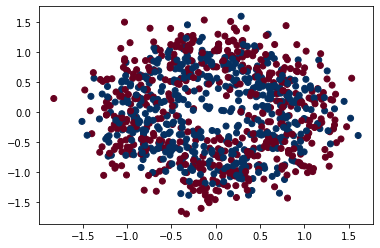

In [5]:
#visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],y=X[:,1],
                c=y,
                cmap=plt.cm.RdBu)

In [6]:
import torch
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

In [7]:
X.dtype,y.dtype

(torch.float32, torch.float32)

In [8]:
#split data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [9]:
len(X_train),len(X_test),len(y_train),len(y_test)

(800, 200, 800, 200)

In [10]:
#Model Building
#let's Build a model to classify our blue and red dots.
#1.Setup device agonastic code so our code will run on an accelerate(GPU) if there is one 
#2.Construct a Model by using `nn.Module` 
#3.Define loss function and optimizer
#4.Create training and testing loop

In [11]:
import torch
from torch import nn

device="cuda" if torch.cuda.is_available() else "cpu"
device


'cpu'

In [12]:
#Now we've setup device agnostic code,let's create a model:
#1.subclass `nn.Module`(almost all models of pytorch subclass nn.Module)
#2.Create 2 nn.Linear() layers that are capable of handling the shapes of our data
#3.Define a forward() method that outlines the forward pass(or forward computation) of the model
#4.instatiate an instance of our model class and send it to target device 

In [13]:
from sklearn import datasets
#1.Construct a model that subclass nn.Module
class CircleModelv0(nn.Module):
    def __init__(self):
        super().__init__()
        #2.Create 2 nn.Linear layers capable of handling the shape of our data
        self.layer_1=nn.Linear(in_features=2,out_features=5) #takes 2 features and upscale to 5 features
        self.layer_2=nn.Linear(in_features=5,out_features=1) #takes 5 features from previous layer and output a single feature(same shape as y)
    
    #3.Define a forward() method that outlines the forward pass    
    def forward(self,x):
       return self.layer_2(self.layer_1(x)) #x----->layer1----->layer2----->output
 
#4.Instatiate an instance of our model class and send it to the target device   
model_0=CircleModelv0().to(device)
model_0

   

CircleModelv0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [14]:
#or u can create model like this also
class CircleModelv1(nn.Module):
    def __init__(self):
        super().__init__()
        self.two_layers_seq=nn.Sequential(
            nn.Linear(in_features=2,out_features=5),
            nn.Linear(in_features=5,out_features=1)
        )
    
    def forward(self,x):
        return self.two_layers_seq
    
model_1=CircleModelv1().to(device)
model_1

CircleModelv1(
  (two_layers_seq): Sequential(
    (0): Linear(in_features=2, out_features=5, bias=True)
    (1): Linear(in_features=5, out_features=1, bias=True)
  )
)

In [15]:
#Let's replicate the model above using nn.Sequential()
model_0=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [16]:
next(model_0.parameters()).device


device(type='cpu')

In [17]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.3446,  0.5420],
                      [ 0.0298,  0.2677],
                      [-0.6846, -0.2583],
                      [-0.2756,  0.4538],
                      [ 0.6199,  0.2042]])),
             ('0.bias', tensor([ 0.3708,  0.0860,  0.5838, -0.5615, -0.1061])),
             ('1.weight',
              tensor([[-0.4066, -0.3553, -0.3165, -0.1982,  0.1411]])),
             ('1.bias', tensor([0.3339]))])

In [18]:
#define a loss function
loss_fn=nn.BCEWithLogitsLoss() #BCEWithLogitsLoss=sigmoid activation function built-in
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.1)

In [19]:
#claculate the accuracy-out of 100 examples, what percentage does our model get right?
def accuracy_fn(y_true,y_pred):
    correct=torch.eq(y_true,y_pred).sum().item()
    acc=(correct/len(y_pred))*100
    return acc



In [20]:
#Train Model
#1.Forwardpass
#2.Calculate the loss
#3.Optimizer zero grade
#4.loss Backward(Backpropgation)
#5.Optimizer step (Gradient descent)

In [21]:
#Going from raw logits.
#we cn convert these logits into prediction probabilities by passing them to some kind of activation function
# (eg:sigmoid for binary classification and softmax for multiclass classification)
#Then we can convert our model's prediction probabilities to prediction labels by either rounding them or taking the argmax().
 

In [22]:
#view the first 5 outputs of the forward pass on the test data
model_0.eval()
with  torch.inference_mode():
    y_logits=model_0(X_test.to(device))[:5]
y_logits 
print(y_logits.squeeze()) 

tensor([-0.2012,  0.1796, -0.1196, -0.2132,  0.5458])


In [23]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [24]:
#Use the sigmoid avtivation function on our model logits to turn them into prediction probabilities
y_pred_probs=torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4499],
        [0.5448],
        [0.4701],
        [0.4469],
        [0.6332]])

In [25]:
#Find the predicted labels
y_preds=torch.round(y_pred_probs)

y_pred_labels=torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))

print(y_preds.squeeze())
print(y_preds)

tensor([True, True, True, True, True])
tensor([0., 1., 0., 0., 1.])
tensor([[0.],
        [1.],
        [0.],
        [0.],
        [1.]])


In [26]:
#Training the Model
torch.manual_seed(42)
#torch.cuda.manual_seed(42) #used when using the GPU
epochs=100

'''X_train,y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)''' #------> while using GPU

for epoch in range(epochs):
    #Training
    model_0.train()
    
    #1.Forward pass
    y_logits=model_0(X_train).squeeze()
    y_pred=torch.round(torch.sigmoid(y_logits)) #turn logits----->pred probs----->pred labels
    
    
    #2.Calculate the loss/accuracy
    #loss=loss_fn(torch.sigmoid(y_logits),y_train) #nn.BCELoss expects prediction prbobilities as input
    
    loss=loss_fn(y_logits, #nn.BCEWithLogitsLoss expects raw logits as input 
                 y_train)
    acc=accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
    
    #3.Optimizer zero grads
    optimizer.zero_grad()
    
    #l4.oss backward(backpropgation)
    loss.backward()
    
    #5.optimizer step (gradient descent)
    optimizer.step()
    
    
    #Testing
    model_0.eval()
    with torch.inference_mode():
        #Forward pass
        test_logits=model_0(X_test).squeeze()
        test_pred=torch.round(torch.sigmoid(test_logits))
        
        #loss function
        test_loss=loss_fn(test_logits,
                         y_test)
        test_acc=accuracy_fn(y_true=y_test,
                            y_pred=test_pred)
        
     #Print what happenning
    if epoch%10==0:
        print(f"Epoch:{epoch} | Training Loss:{loss:.5f} | Training accuracy:{acc:.2f}% | Test Loss{test_loss:.5f} | Testing accuracy: {test_acc:.2f}%")
        
    
    
    

Epoch:0 | Training Loss:0.71656 | Training accuracy:50.75% | Test Loss0.70683 | Testing accuracy: 49.50%
Epoch:10 | Training Loss:0.71015 | Training accuracy:50.12% | Test Loss0.70260 | Testing accuracy: 49.50%
Epoch:20 | Training Loss:0.70583 | Training accuracy:50.00% | Test Loss0.69982 | Testing accuracy: 49.50%
Epoch:30 | Training Loss:0.70281 | Training accuracy:49.75% | Test Loss0.69791 | Testing accuracy: 50.00%
Epoch:40 | Training Loss:0.70062 | Training accuracy:49.62% | Test Loss0.69658 | Testing accuracy: 50.50%
Epoch:50 | Training Loss:0.69899 | Training accuracy:49.38% | Test Loss0.69562 | Testing accuracy: 50.50%
Epoch:60 | Training Loss:0.69775 | Training accuracy:49.62% | Test Loss0.69494 | Testing accuracy: 50.00%
Epoch:70 | Training Loss:0.69680 | Training accuracy:49.38% | Test Loss0.69444 | Testing accuracy: 50.00%
Epoch:80 | Training Loss:0.69606 | Training accuracy:49.62% | Test Loss0.69408 | Testing accuracy: 50.00%
Epoch:90 | Training Loss:0.69547 | Training acc

In [27]:
import requests
from pathlib import Path

#Downloading the helper function
if Path("helper_function.py").is_file():
    print("helper_function.py already exist")
else:
    print("Download helper_function.py ")
    request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_function.py","wb") as f:
        f.write(request.content)
        
    

helper_function.py already exist


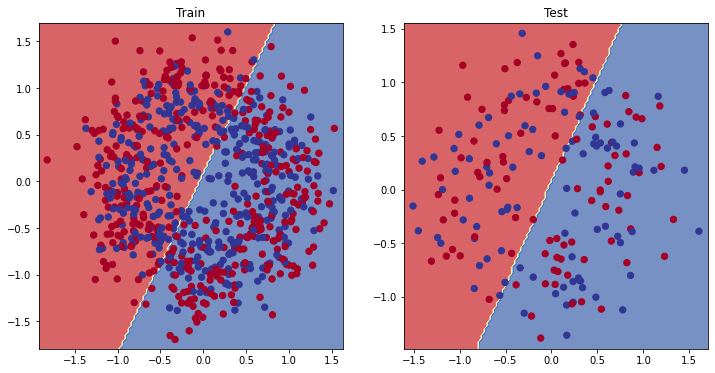

In [28]:
from helper_function import plot_predictions,plot_decision_boundary
#plot decision boundary of the model

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)

In [29]:
#Improving the Model(from a model prespective)
#1.Add more layers-give the model more chances to learn about patterns in the data
#2.Add more hidden units-go from 5 hidden units to 10 hidden units 
#3.Fit for longer
#4.Changing the activation function
#5.Change the learning rate
#6.Change the loss function

#These options are all from a model's  prespective  because they deal directly with the model,rather then the data




In [30]:
class CircleModelv1(nn.Module):
    def __init__(self):
        super().__init__ () 
        self.layer_1=nn.Linear(in_features=2,out_features=10)
        self.layer_2=nn.Linear(in_features=10,out_features=10)
        self.layer_3=nn.Linear(in_features=10,out_features=1)
        
        
    def forward(self,x):
       # z=self.layer_1(x)  
       # z=self.layer_2(z)
       # z=self.layer_3(z)
    	return self.layer_3(self.layer_2(self.layer_1(x)))
model_1=CircleModelv1()
model_1
    

CircleModelv1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [31]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

In [32]:
#Loss function
loss_fn=nn.BCEWithLogitsLoss()

#Optimizer
optimizer=torch.optim.SGD(params=model_1.parameters(),
                         lr=0.1)

In [33]:
X_train.dtype

torch.float32

In [34]:
torch.manual_seed(42)
Epochs=2000

#Training loop
for epoch in range(Epochs):
    model_1.train()
    y_logits=model_1(X_train).squeeze()
    y_pred=torch.round(torch.sigmoid(y_logits))
    
    loss=loss_fn(y_logits,y_train)
    train_accuracy=accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
	#Testing
    model_1.eval()
    with torch.inference_mode():
        test_logits=model_1(X_test).squeeze()
        test_pred=torch.round(torch.sigmoid(test_logits))
        
        loss_test=loss_fn(test_logits,y_test)
        test_accuracy=accuracy_fn(y_true=y_test,y_pred=test_pred)
        
        
    if epoch%10==0:
        print(f"Epochs:{epoch} | Training loss:{loss:.5f} | Training accuracy:{train_accuracy:.2f} | Testing loss:{loss_test:.5f} | Testing accuracy:{test_accuracy:.2f}")

Epochs:0 | Training loss:0.69370 | Training accuracy:51.12 | Testing loss:0.69300 | Testing accuracy:48.50
Epochs:10 | Training loss:0.69348 | Training accuracy:50.00 | Testing loss:0.69305 | Testing accuracy:47.50
Epochs:20 | Training loss:0.69334 | Training accuracy:50.00 | Testing loss:0.69314 | Testing accuracy:50.50
Epochs:30 | Training loss:0.69324 | Training accuracy:50.38 | Testing loss:0.69325 | Testing accuracy:51.00
Epochs:40 | Training loss:0.69317 | Training accuracy:50.62 | Testing loss:0.69335 | Testing accuracy:50.00
Epochs:50 | Training loss:0.69312 | Training accuracy:50.00 | Testing loss:0.69346 | Testing accuracy:50.00
Epochs:60 | Training loss:0.69308 | Training accuracy:50.00 | Testing loss:0.69355 | Testing accuracy:49.00
Epochs:70 | Training loss:0.69306 | Training accuracy:50.12 | Testing loss:0.69364 | Testing accuracy:51.00
Epochs:80 | Training loss:0.69304 | Training accuracy:49.88 | Testing loss:0.69373 | Testing accuracy:49.50
Epochs:90 | Training loss:0.6

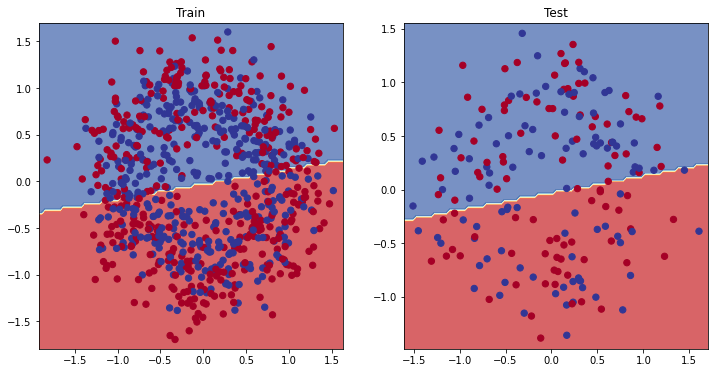

In [35]:
from helper_function import plot_predictions,plot_decision_boundary
#plot decision boundary of the model

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1,X_test,y_test)

In [36]:
#prepare data to see if our model can fit a straight line

weight=0.7
bias=0.3
start=0
end=1
step=0.01
X_regression=torch.arange(start,end,step).unsqueeze(dim=1)
y_regression=weight*X_regression+bias

print(len(X_regression))
X_regression[:5],y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [37]:
train_split=int(0.8*len(X_regression))
X_train_regerssion,y_train_regression=X_regression[:train_split],y_regression[:train_split]
X_test_regression,y_test_regerssion=X_regression[train_split:],y_regression[train_split:]

len(X_train_regerssion),len(y_train_regression),len(X_test_regression),len(y_test_regerssion)

(80, 80, 20, 20)

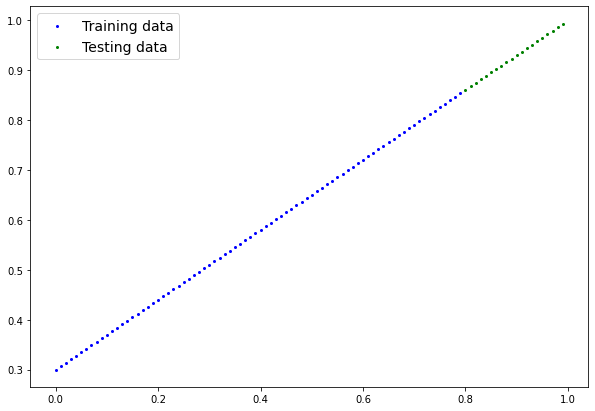

In [38]:
plot_predictions(train_data=X_train_regerssion,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regerssion)

In [39]:
#Adjust model_1 to fit a straight line
model_2=nn.Sequential(
    nn.Linear(in_features=1,out_features=10),
    nn.Linear(in_features=10,out_features=10),
    nn.Linear(in_features=10,out_features=1)
).to(device)
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [40]:
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_2.parameters(),lr=0.01)

In [41]:
torch.manual_seed(42)
Epochs=1000
#training
for epoch in range(Epochs):
    model_2.train()
    y_pred=model_2(X_train_regerssion)
    train_loss=loss_fn(y_pred,y_train_regression)
    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()
    
    #testing
    model_2.eval()
    with torch.inference_mode():
        y_test_pred=model_2(X_test_regression)
        test_loss=loss_fn(y_test_pred,y_test_regerssion)
        
    if epoch%10==0:
        print(f"Epochs:{epoch} | Training loss:{train_loss} | Tesing loss:{test_loss}")


Epochs:0 | Training loss:0.7598584890365601 | Tesing loss:0.9110288619995117
Epochs:10 | Training loss:0.4024040102958679 | Tesing loss:0.5047394037246704
Epochs:20 | Training loss:0.06007448583841324 | Tesing loss:0.10150804370641708
Epochs:30 | Training loss:0.015594890341162682 | Tesing loss:0.03230735659599304
Epochs:40 | Training loss:0.030917158350348473 | Tesing loss:0.0011067688465118408
Epochs:50 | Training loss:0.031960684806108475 | Tesing loss:0.0010762035381048918
Epochs:60 | Training loss:0.03191908448934555 | Tesing loss:0.0017018318176269531
Epochs:70 | Training loss:0.030806491151452065 | Tesing loss:0.0009658157941885293
Epochs:80 | Training loss:0.030771737918257713 | Tesing loss:0.0014975250232964754
Epochs:90 | Training loss:0.029671888798475266 | Tesing loss:0.0009232908487319946
Epochs:100 | Training loss:0.02857953868806362 | Tesing loss:0.0008127212640829384
Epochs:110 | Training loss:0.02962152101099491 | Tesing loss:0.001970785902813077
Epochs:120 | Training 

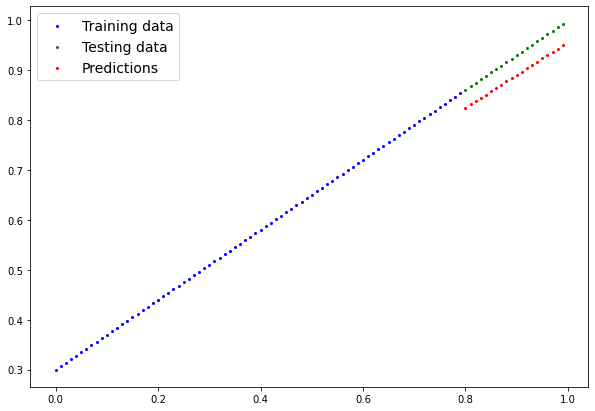

In [42]:
model_2.eval()
with torch.inference_mode():
    y_preds=model_2(X_test_regression)

plot_predictions(train_data=X_train_regerssion,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regerssion,
                 predictions=y_preds)


In [43]:
#Missing Piece:Non lineraty
#What pattern could u draw if you were given an infinite amount of straight and non-straight lines?
#or in machine learning terms,an infinite(but really it is finite) of linear and non-linear functions?


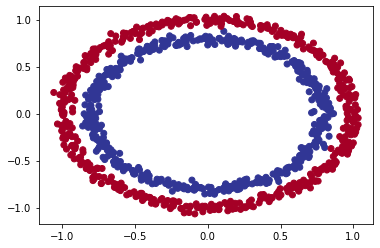

In [290]:
#Recreating non-linear data(red and blue circles)
import matplotlib.pyplot as plt 
from sklearn.datasets import make_circles

n_samples=1000
X,y=make_circles(n_samples,
                 noise=0.03,
                 random_state=42)

plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [291]:
#convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

#Turn data into tensors
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

X_train[:5],y_train[:5]




(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [292]:
#Building a model with NON-Linearity
#Linear-Straight line
#Non-Linear-non-straight line
#Artificial neural networks are a large combination of linear(straight) and non-linear(non-straight) functions which are potentially able to find patters in data

from torch import nn 
class CircleModelv2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1=nn.Linear(in_features=2,out_features=10)
        self.layer_2=nn.Linear(in_features=10,out_features=10)
        self.layer_3=nn.Linear(in_features=10,out_features=1)
        self.relu=nn.ReLU() #relu is a non linear activation function
        
    def forward(self,x):
        #where should we put our non-linear activation function?
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

In [293]:
model_non=CircleModelv2()
model_non

CircleModelv2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [294]:
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model_non.parameters(),lr=0.1)

In [295]:
torch.manual_seed(42)
Epochs=1500

for epoch in range(Epochs):
    #Training 
    model_non.train()
    y_logits=model_non(X_train).squeeze()
    y_pred=torch.round(torch.sigmoid(y_logits))
    
    loss=loss_fn(y_logits,y_train)
    accuracy=accuracy_fn(y_true=y_train,y_pred=y_pred)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    model_non.eval()
    with torch.inference_mode():
        test_logits=model_non(X_test).squeeze()
        test_pred=torch.round(torch.sigmoid(test_logits))
        test_loss=loss_fn(test_logits,y_test)
        test_accuracy=accuracy_fn(y_true=y_test,y_pred=test_pred)
        
    if epoch%100==0:
        print(f"Epochs:{epoch} | Training loss:{loss:5f} | Training accuracy:{accuracy:.2f} | Testing loss:{test_loss:.5f} | Testing accuracy: {test_accuracy:.2f}")

Epochs:0 | Training loss:0.692946 | Training accuracy:50.00 | Testing loss:0.69319 | Testing accuracy: 50.00
Epochs:100 | Training loss:0.691153 | Training accuracy:52.88 | Testing loss:0.69102 | Testing accuracy: 52.50
Epochs:200 | Training loss:0.689774 | Training accuracy:53.37 | Testing loss:0.68940 | Testing accuracy: 55.00
Epochs:300 | Training loss:0.687950 | Training accuracy:53.00 | Testing loss:0.68723 | Testing accuracy: 56.00
Epochs:400 | Training loss:0.685168 | Training accuracy:52.75 | Testing loss:0.68411 | Testing accuracy: 56.50
Epochs:500 | Training loss:0.681022 | Training accuracy:52.75 | Testing loss:0.67941 | Testing accuracy: 56.50
Epochs:600 | Training loss:0.675149 | Training accuracy:54.50 | Testing loss:0.67285 | Testing accuracy: 56.00
Epochs:700 | Training loss:0.666589 | Training accuracy:58.38 | Testing loss:0.66322 | Testing accuracy: 59.00
Epochs:800 | Training loss:0.651595 | Training accuracy:64.00 | Testing loss:0.64757 | Testing accuracy: 67.50
Epo

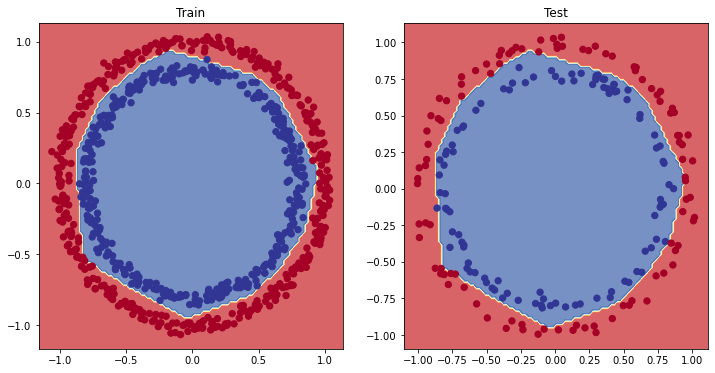

In [296]:
from helper_function import plot_predictions,plot_decision_boundary
#plot decision boundary of the model

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_non,X_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_non,X_test,y_test)

In [297]:
A=torch.arange(-10,10,1,dtype=torch.float32)

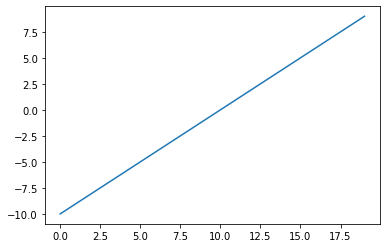

In [298]:
plt.plot(A)

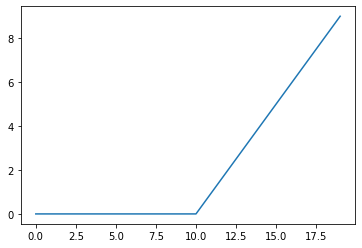

In [299]:
plt.plot(torch.relu(A))

In [300]:
def relu(x:torch.Tensor)->torch.Tensor:
    return torch.maximum(torch.tensor(0),x)

In [301]:
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

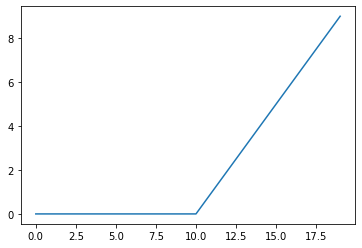

In [302]:
plt.plot(relu(A))

In [303]:
def sigmoid(x):
    return 1/(1+torch.exp(-x))

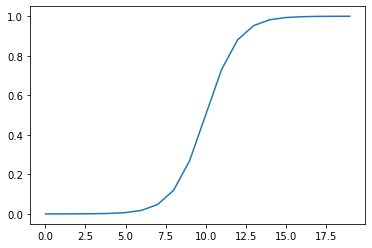

In [304]:
plt.plot(torch.sigmoid(A))

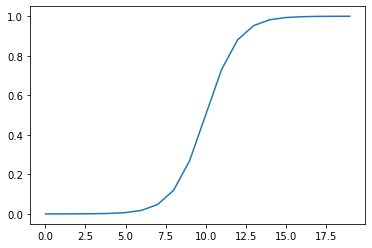

In [305]:
plt.plot(sigmoid(A))

In [306]:
#Putting it all together with a multi-class classification problem

#Binary classification-one thing or another(cat vs dog,spam vs not-spam,fraud vs not fraud) 
#Multi-class classification-more then one thing or another(cat vs dog vs chicken)

In [115]:
#import depencences
import torch
import matplotlib.pyplot as plt 
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

#set the hyperparameters for data creation
NUM_CLASSES=4
NUM_FEATURES=2
RANDOM_SEED=42

#1. Create Multi-class data
X_blob,y_blob=make_blobs(n_samples=1000,
                         n_features=NUM_FEATURES,
                         centers=NUM_CLASSES,
                         cluster_std=1.5, #give the cluster a little shake up
                         random_state=RANDOM_SEED)

#2.Turn data into tensors 
X_blob=torch.from_numpy(X_blob).type(torch.float)
y_blob=torch.from_numpy(y_blob).type(torch.LongTensor)

#3 Split into train and test

X_train_blob,X_test_blob,y_train_blob,y_test_blob=train_test_split(X_blob,
                                                                   y_blob,
                                                                    test_size=0.2,
                                                                    random_state=RANDOM_SEED)
len(X_train_blob),len(y_train_blob),len(X_test_blob),len(y_test_blob)

(800, 800, 200, 200)

In [122]:
X_train_blob[:10],y_train_blob[:10],X_test_blob[:10],y_test_blob[:10]

(tensor([[ 5.0405,  3.3076],
         [-2.6249,  9.5260],
         [-8.5240, -9.0402],
         [-6.0262, -4.4375],
         [-3.3397,  7.2175],
         [ 0.7755,  7.8018],
         [-4.2962,  9.9991],
         [ 3.8225,  2.5719],
         [-7.6469,  5.4421],
         [-3.7474,  8.5322]]),
 tensor([1, 0, 2, 2, 0, 0, 0, 1, 3, 0]),
 tensor([[ 4.6675,  4.4878],
         [-7.9969,  6.8803],
         [-6.2801, -7.8571],
         [ 3.6833,  1.1767],
         [-0.1404, 10.1654],
         [-9.7570,  7.8658],
         [-4.4295, -8.5996],
         [-2.1731,  9.0332],
         [-9.2145, -7.5223],
         [-1.4015,  9.2713]]),
 tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0]))

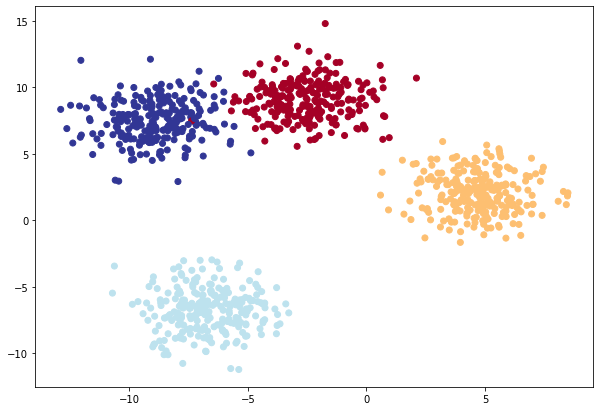

In [123]:
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0],X_blob[:,1],c=y_blob,cmap=plt.cm.RdYlBu)

In [124]:
#Building a multi-class classification model in PyTorch

In [125]:

device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [126]:
from torch import nn

# Build model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.Linear(in_features=hidden_units, out_features=output_features),
        )
    def forward(self,x):
        return self.linear_layer_stack(x)


In [127]:
blob_model=BlobModel(input_features=2,output_features=4,hidden_units=8).to(device)

In [128]:
blob_model.state_dict()


OrderedDict([('linear_layer_stack.0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998]])),
             ('linear_layer_stack.0.bias',
              tensor([ 0.5451,  0.1045, -0.3301,  0.1802, -0.3258, -0.0829, -0.2872,  0.4691])),
             ('linear_layer_stack.1.weight',
              tensor([[-0.2791, -0.1630, -0.0998, -0.2126,  0.0334, -0.3492,  0.3193, -0.3003],
                      [ 0.2730,  0.0588, -0.1148,  0.2185,  0.0551,  0.2857,  0.0387, -0.1115],
                      [ 0.0950, -0.0959,  0.1488,  0.3157,  0.2044, -0.1546,  0.2041,  0.0633],
                      [ 0.1795, -0.2155, -0.3500, -0.1366, -0.2712,  0.2901,  0.1018,  0.1464],
                      [ 0.1118, -0.0062,  0.276

In [129]:
torch.unique(y_train_blob)

tensor([0, 1, 2, 3])

In [130]:
#Create a loss function and an optimizer for a multi-class classification model
loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.SGD(params=blob_model.parameters(),
                         lr=0.1)

In [131]:
#Getting prediction probabilities for multi-class PyTorch model
#In order to evaluate and train and test our model, we need to convert our model's outputs(logits) to prediction probabilities and then to prediction labels

#Logits(raw output of the model)->prediction probabilities(use torch.softmax)->prediction label(take the argmax of the prediction probablities)






In [132]:
#Let's get some raw outputs of our model(logits)
blob_model.eval()
with torch.inference_mode():
    y_logits=blob_model(X_test_blob)

In [133]:
y_logits[:10]

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852],
        [ 2.0878, -1.3728,  2.1248,  2.5052],
        [ 1.8310,  0.8851,  2.1674,  0.6006],
        [ 0.1412, -1.4742, -0.0360,  1.0373],
        [ 2.9426,  0.7047,  3.3670,  1.6184],
        [-0.0645, -1.5006, -0.2666,  0.8940]])

In [134]:
y_test_blob[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [135]:
#Convert our model's logits outputs to prediction probabilities
y_pred_probs=torch.softmax(y_logits,dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-1.2549, -0.8112, -1.4795, -0.5696],
        [ 1.7168, -1.2270,  1.7367,  2.1010],
        [ 2.2400,  0.7714,  2.6020,  1.0107],
        [-0.7993, -0.3723, -0.9138, -0.5388],
        [-0.4332, -1.6117, -0.6891,  0.6852]])
tensor([[0.1872, 0.2918, 0.1495, 0.3715],
        [0.2824, 0.0149, 0.2881, 0.4147],
        [0.3380, 0.0778, 0.4854, 0.0989],
        [0.2118, 0.3246, 0.1889, 0.2748],
        [0.1945, 0.0598, 0.1506, 0.5951]])


In [136]:
#Convert prediction probabilities to prediction label
y_preds=torch.argmax(y_pred_probs,dim=1)
y_preds

tensor([3, 3, 2, 1, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 2,
        2, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 2, 1, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3,
        3, 3, 1, 3, 3, 1, 3, 2, 3, 1, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 3, 3, 2, 3, 3, 3, 3, 2, 3, 1, 3, 3, 2, 1, 1, 3, 2, 2, 3, 3, 3, 1, 2,
        2, 3, 3, 1, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 1, 1, 3, 2, 2,
        2, 2, 3, 3, 3, 2, 2, 1, 3, 2, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3,
        2, 2, 2, 3, 3, 1, 1, 1, 1, 1, 3, 1, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3,
        1, 3, 2, 3, 3, 1, 2, 3])

In [137]:
y_test_blob

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

In [159]:
#Creating the training loop and testing loop for multi-class classification
torch.manual_seed(42)
torch.cuda.manual_seed(42)

Epochs=100
X_train_blob,y_train_blob=X_train_blob.to(device),y_train_blob.to(device)
X_test_blob,y_test_blob=X_test_blob.to(device),y_test_blob.to(device)

for epoch in range(Epochs):
    #Training
    blob_model.train()
    y_logits=blob_model(X_train_blob)
    y_preds=torch.softmax(y_logits,dim=1).argmax(dim=1)
    loss=loss_fn(y_logits,y_train_blob)
    accuracy=accuracy_fn(y_true=y_train_blob,y_pred=y_preds)
    
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    #Testing
    blob_model.eval()
    with torch.inference_mode():
        test_logits=blob_model(X_test_blob)
        test_preds=torch.softmax(test_logits,dim=1).argmax(dim=1)
        
        test_loss=loss_fn(test_logits,y_test_blob)
        test_accuracy=accuracy_fn(y_true=y_test_blob,y_pred=test_preds)
    
    if epoch%10==0:
        print(f"Epochs: {epochs} | Training loss:{loss:.5f} | Training accuracy:{accuracy:.2f}% | Testing loss:{test_loss:5f} | Testing accuracy:{test_accuracy:.2f}%")
    
    
 
    
    

Epochs: 100 | Training loss:0.02707 | Training accuracy:99.12% | Testing loss:0.017038 | Testing accuracy:99.50%
Epochs: 100 | Training loss:0.02686 | Training accuracy:99.12% | Testing loss:0.016752 | Testing accuracy:99.50%
Epochs: 100 | Training loss:0.02667 | Training accuracy:99.12% | Testing loss:0.016490 | Testing accuracy:99.50%
Epochs: 100 | Training loss:0.02650 | Training accuracy:99.12% | Testing loss:0.016250 | Testing accuracy:99.50%
Epochs: 100 | Training loss:0.02635 | Training accuracy:99.25% | Testing loss:0.016029 | Testing accuracy:99.50%
Epochs: 100 | Training loss:0.02621 | Training accuracy:99.25% | Testing loss:0.015824 | Testing accuracy:99.50%
Epochs: 100 | Training loss:0.02608 | Training accuracy:99.25% | Testing loss:0.015634 | Testing accuracy:99.50%
Epochs: 100 | Training loss:0.02596 | Training accuracy:99.25% | Testing loss:0.015457 | Testing accuracy:99.50%
Epochs: 100 | Training loss:0.02585 | Training accuracy:99.25% | Testing loss:0.015291 | Testing

In [160]:
y_logits.shape,y_train_blob.shape

(torch.Size([800, 4]), torch.Size([800]))

In [161]:
with torch.inference_mode():
    y_logits=blob_model(X_test_blob)

In [162]:
y_pred_probs=torch.softmax(y_logits,dim=1)
y_pred_probs[:10]

tensor([[1.7070e-04, 9.9983e-01, 1.7642e-15, 1.3528e-12],
        [5.5893e-04, 2.7056e-14, 8.8071e-05, 9.9935e-01],
        [7.0548e-16, 2.0783e-20, 9.9998e-01, 2.2382e-05],
        [2.4345e-04, 9.9976e-01, 2.5006e-10, 1.9956e-09],
        [9.9862e-01, 1.3755e-03, 1.3918e-13, 1.9977e-07],
        [3.6977e-05, 1.3186e-17, 2.4847e-05, 9.9994e-01],
        [7.3116e-15, 3.1387e-17, 9.9999e-01, 8.8299e-06],
        [9.9987e-01, 1.9334e-05, 4.0007e-10, 1.1164e-04],
        [1.6789e-18, 3.0919e-26, 9.9997e-01, 3.0967e-05],
        [9.9988e-01, 1.0992e-04, 3.3113e-11, 1.3245e-05]])

In [163]:
y_pred=torch.argmax(y_pred_probs,dim=1)
y_pred

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 0, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

In [168]:
y_test_blob

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

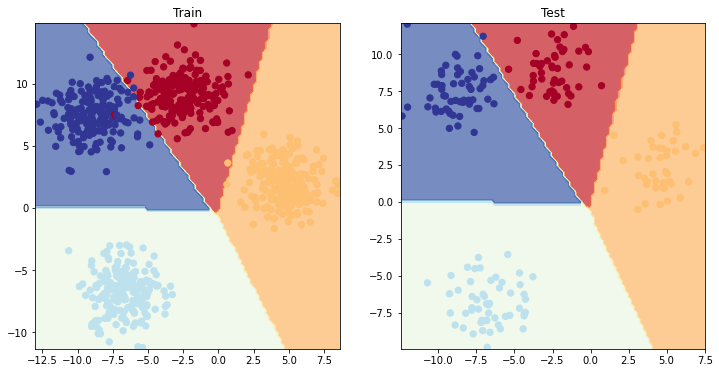

In [164]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(blob_model,X_train_blob,y_train_blob)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(blob_model,X_test_blob,y_test_blob)

In [165]:
#A few more classification metrics (to evaluate our classification model)
#1.Precision
#2.Recall
#3.F1 score
#4.confusion matrix
#5.Classification Report

In [167]:
import torchmetrics
from torchmetrics import Accuracy
torchmetrics_accuracy = Accuracy(task='multiclass', num_classes=4).to(device)
torchmetrics_accuracy(y_pred,y_test_blob)

tensor(0.9950)

Multi-class Classification-2

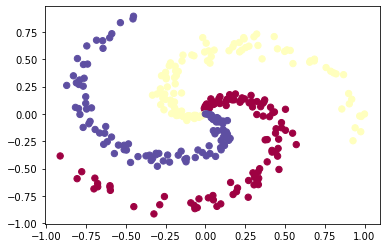

In [313]:
import numpy as np
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

In [314]:
X[:10],y[:10]

(array([[-0.        ,  0.        ],
        [ 0.00124449,  0.01002405],
        [-0.00326148,  0.01993701],
        [ 0.00499632,  0.0298883 ],
        [ 0.01174109,  0.03866049],
        [-0.00680459,  0.05004456],
        [ 0.02661944,  0.05444722],
        [-0.00133307,  0.0706945 ],
        [ 0.00512227,  0.08064557],
        [ 0.00796306,  0.09055966]]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8))

In [315]:
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.LongTensor)
print(torch.unique(y))
print(X.shape,y.shape)

tensor([0, 1, 2])
torch.Size([300, 2]) torch.Size([300])


In [316]:
from sklearn.model_selection import train_test_split
X_septal_train,X_septal_test,y_septal_train,y_septal_test=train_test_split(X,y,test_size=0.2,random_state=42)
len(X_septal_train),len(X_septal_test),len(y_septal_train),len(y_septal_test)

(240, 60, 240, 60)

In [214]:
X_septal_train.shape,X_septal_test.shape,y_septal_train.shape,y_septal_test.shape

(torch.Size([240, 2]),
 torch.Size([60, 2]),
 torch.Size([240]),
 torch.Size([60]))

In [349]:
from torch import nn
class SeptalModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers=nn.Sequential(
            nn.Linear(in_features=2,out_features=10),
            nn.ReLU(),
            nn.Linear(in_features=10,out_features=10),
            nn.ReLU(),
            nn.Linear(in_features=10,out_features=3)
            
            
        )
    def forward(self,x):
        return self.layers(x)

In [350]:
# Let's calculuate the accuracy for when we fit our model
 # colab doesn't come with torchmetrics
from torchmetrics import Accuracy
acc_fn=Accuracy(task='multiclass', num_classes=3).to(device)
acc_fn

MulticlassAccuracy()

In [351]:
septal_model=SeptalModel()
septal_model

SeptalModel(
  (layers): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10, out_features=10, bias=True)
    (3): ReLU()
    (4): Linear(in_features=10, out_features=3, bias=True)
  )
)

In [352]:
septal_model.state_dict()

OrderedDict([('layers.0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layers.0.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layers.2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  

In [353]:
septal_loss_fn=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(params=septal_model.parameters(),lr=0.1)


In [354]:
X_septal_test[:5],X_septal_train[:5],y_septal_train[:5]

(tensor([[ 0.0298, -0.0055],
         [-0.6161, -0.2546],
         [ 0.0370,  0.5239],
         [ 0.0080,  0.0906],
         [-0.0466, -0.3301]]),
 tensor([[ 0.0956, -0.3088],
         [ 0.4537, -0.3864],
         [ 0.0266,  0.0544],
         [ 0.8574,  0.0448],
         [ 0.2407,  0.6970]]),
 tensor([2, 0, 0, 1, 1]))

In [355]:
with torch.inference_mode():
    septal_logits=septal_model(X_septal_test)
septal_logits[:10]

tensor([[-0.2214, -0.0604,  0.2364],
        [-0.2268, -0.0635,  0.2381],
        [-0.2201, -0.0503,  0.2493],
        [-0.2233, -0.0608,  0.2394],
        [-0.2173, -0.0614,  0.2238],
        [-0.2162, -0.0590,  0.2294],
        [-0.2167, -0.0578,  0.2693],
        [-0.2231, -0.0623,  0.2336],
        [-0.2229, -0.0611,  0.2377],
        [-0.2197, -0.0495,  0.2813]])

In [356]:
septal_probs=torch.softmax(septal_logits,dim=1)
septal_probs[:10]

tensor([[0.2663, 0.3128, 0.4209],
        [0.2653, 0.3124, 0.4223],
        [0.2643, 0.3132, 0.4226],
        [0.2656, 0.3125, 0.4219],
        [0.2686, 0.3139, 0.4175],
        [0.2680, 0.3136, 0.4184],
        [0.2633, 0.3086, 0.4281],
        [0.2664, 0.3129, 0.4207],
        [0.2659, 0.3126, 0.4215],
        [0.2607, 0.3091, 0.4302]])

In [357]:
septal_pred=torch.argmax(septal_probs,dim=1)
septal_pred

tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [358]:
y_septal_test

tensor([2, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 0, 2, 0, 1, 2, 2, 2, 1, 1, 0, 1, 2, 2,
        1, 0, 2, 2, 1, 2, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2,
        1, 2, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0])

In [359]:
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [360]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

X_septal_train,X_septal_test=X_septal_train.to(device),X_septal_test.to(device)
y_septal_train,y_septal_test=y_septal_train.to(device),y_septal_test.to(device)

Epochs=5000

for epoch in range(Epochs):
    septal_model.train()
    septal_logits=septal_model(X_septal_train)
    septal_pred=torch.softmax(septal_logits,dim=1).argmax(dim=1)
    
    septal_loss=septal_loss_fn(septal_logits,y_septal_train)
   # septal_accuracy=accuracy_fn(y_true=y_septal_train,y_pred=septal_pred)
    septal_accuracy=acc_fn(septal_pred,y_septal_train)
    
    optimizer.zero_grad()
    septal_loss.backward()
    optimizer.step()
    

    septal_model.eval()
    with torch.inference_mode():
        septal_test_logits=septal_model(X_septal_test)
        septal_test_preds=torch.softmax(septal_test_logits,dim=1).argmax(dim=1)
        
        septal_test_loss=septal_loss_fn(septal_test_logits,y_septal_test)
       # septal_test_accuracy=accuracy_fn(y_true=y_septal_test,y_pred=septal_test_preds)
        septal_test_accuracy=acc_fn(septal_test_preds,y_septal_test)
        
    if epoch%1000==0:
        print(f"Epoch:{epoch}| Training loss:{septal_loss:.5f} | Training accuracy: {septal_accuracy:.2f}% | Testing loss:{septal_test_loss:.5f},| Testing accuracy:{septal_test_accuracy:.2f}%")

Epoch:0| Training loss:1.11711 | Training accuracy: 0.32% | Testing loss:1.09414,| Testing accuracy:0.37%
Epoch:1000| Training loss:0.01617 | Training accuracy: 0.99% | Testing loss:0.00074,| Testing accuracy:1.00%
Epoch:2000| Training loss:0.01480 | Training accuracy: 0.99% | Testing loss:0.00038,| Testing accuracy:1.00%
Epoch:3000| Training loss:0.01495 | Training accuracy: 0.99% | Testing loss:0.00020,| Testing accuracy:1.00%
Epoch:4000| Training loss:0.01434 | Training accuracy: 0.99% | Testing loss:0.00151,| Testing accuracy:1.00%


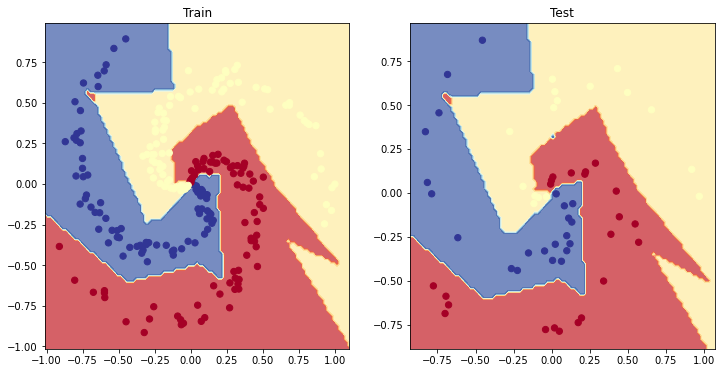

In [361]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(septal_model,X_septal_train,y_septal_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(septal_model,X_septal_test,y_septal_test)